In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Exited'].unique()

array([1, 0])

In [ ]:
df1 = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#all missing values in the data
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df1.shape

(10000, 11)

In [ ]:
#Seperate numerical and non-numerical data columns
df_num = df1.select_dtypes(include='number')
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

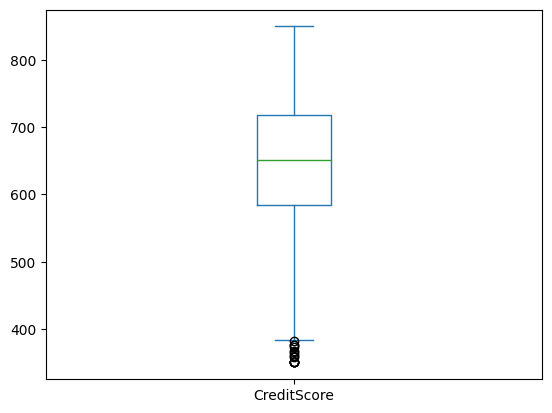

In [ ]:
#Unvariate analysis on numerical columns
df['CreditScore'].plot.box()

<Axes: >

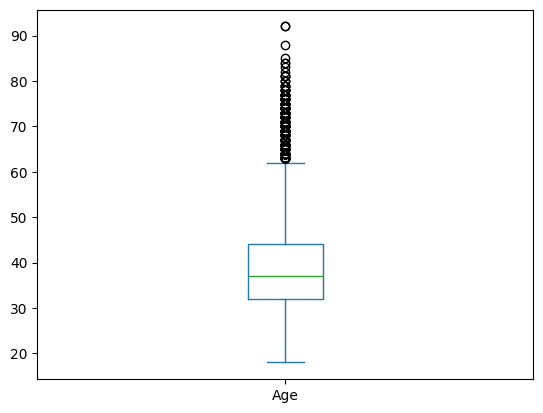

In [ ]:
df['Age'].plot.box()

<Axes: >

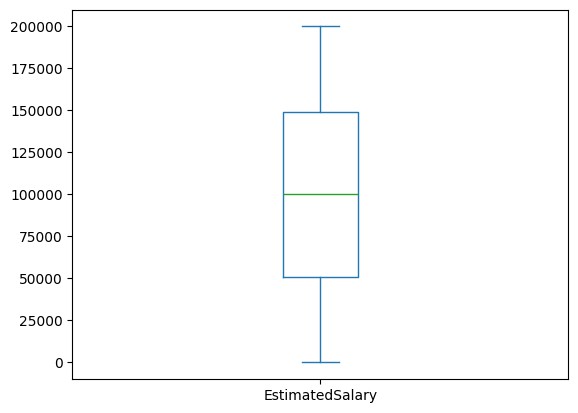

In [ ]:
df['EstimatedSalary'].plot.box()

<Axes: >

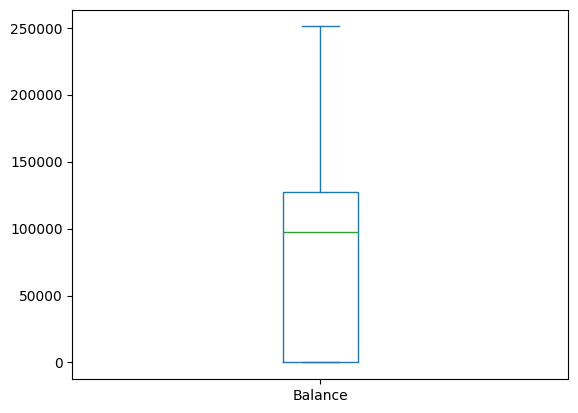

In [ ]:
df['Balance'].plot.box()

In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df_non_num = df1.select_dtypes(exclude='number')
df_non_num.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
df_non_num['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df_non_num['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Relation between geography and exit..?
pd.crosstab(df1['Geography'] , df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

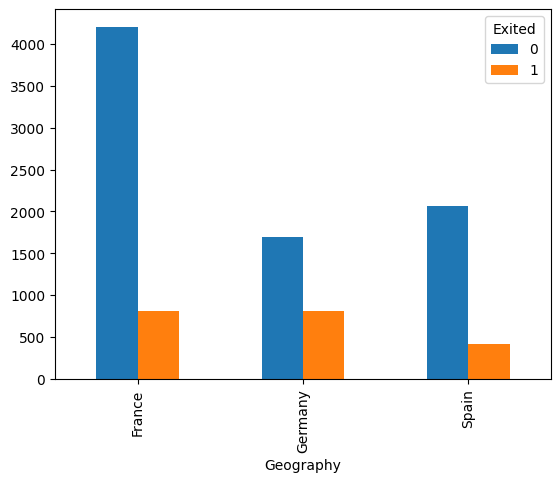

In [ ]:
#Relation between geography and exit..?
pd.crosstab(df1['Geography'] , df1['Exited']).plot.bar()

<Axes: xlabel='Gender'>

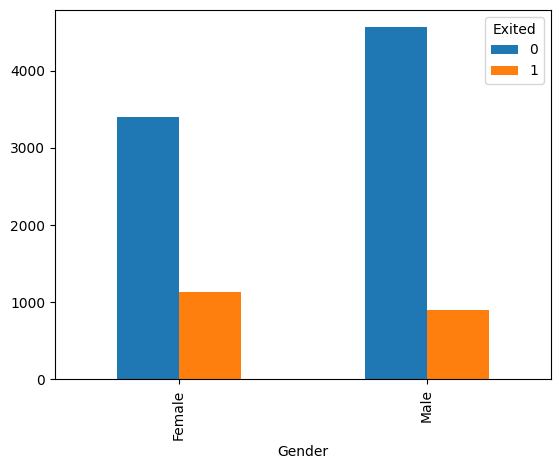

In [ ]:
pd.crosstab(df1['Gender'] , df1['Exited']).plot.bar()

In [ ]:
df1.groupby('Exited')['Age'].mean()

,Age
Exited,
0,37.408389
1,44.837997


<Axes: xlabel='Exited'>

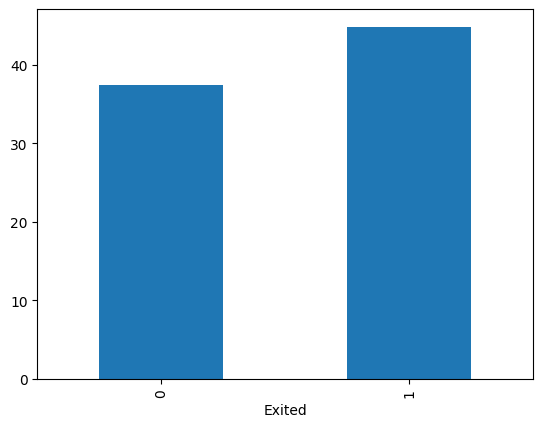

In [ ]:
df1.groupby('Exited')['Age'].mean().plot.bar()

<Axes: xlabel='Exited'>

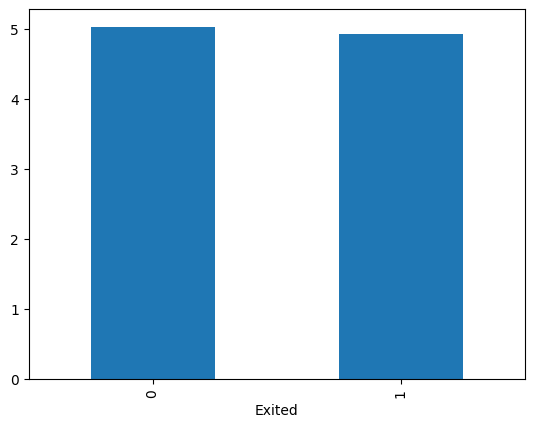

In [ ]:
df1.groupby('Exited')['Tenure'].mean().plot.bar()

<Axes: xlabel='Exited'>

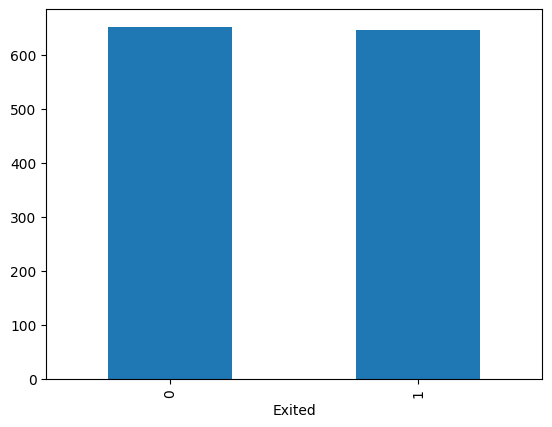

In [ ]:
df1.groupby('Exited')['CreditScore'].mean().plot.bar()

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='NumOfProducts'>

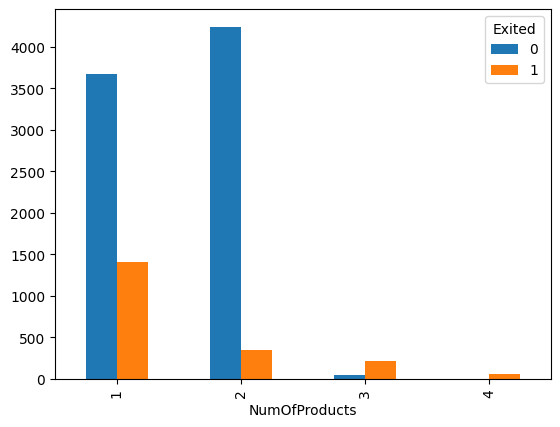

In [ ]:
pd.crosstab(df1['NumOfProducts'] , df1['Exited']).plot.bar()

<Axes: xlabel='HasCrCard'>

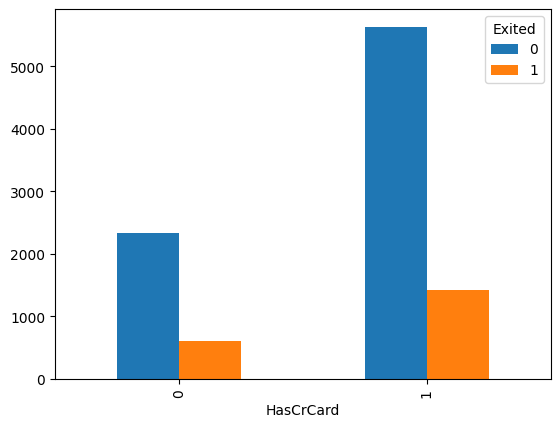

In [ ]:
pd.crosstab(df1['HasCrCard'] , df1['Exited']).plot.bar()

In [ ]:
pd.crosstab(df1['IsActiveMember'] , df1['Exited'])

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


<Axes: xlabel='IsActiveMember'>

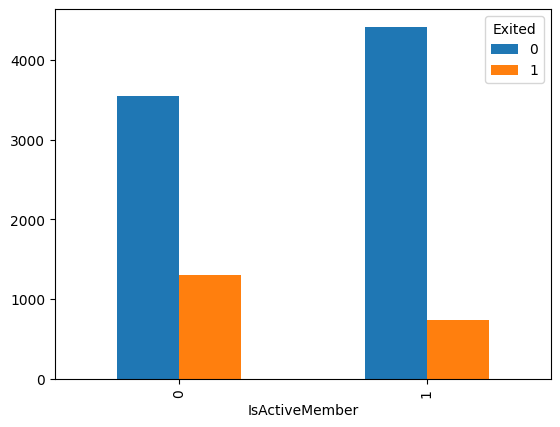

In [ ]:
pd.crosstab(df1['IsActiveMember'] , df1['Exited']).plot.bar()

In [ ]:
df1.groupby('Exited')['EstimatedSalary'].mean()

,EstimatedSalary
Exited,
0,99738.391772
1,101465.677531


<Axes: xlabel='Exited'>

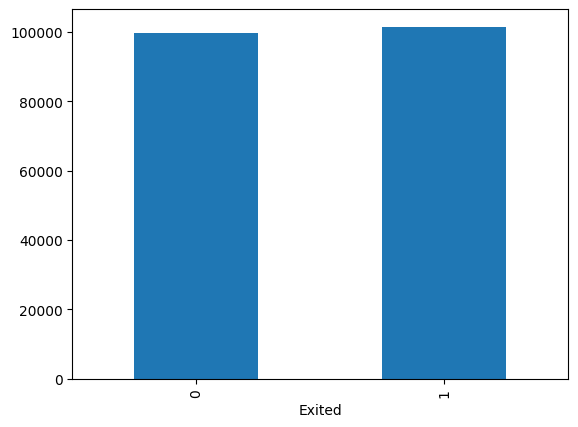

In [ ]:
df1.groupby('Exited')['EstimatedSalary'].mean().plot.bar()

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df1.drop(columns = ['Exited'])
y = df1['Exited']

In [ ]:
y.unique()

array([1, 0])

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
y.value_counts()/len(y)

,count
Exited,
0,0.7963
1,0.2037


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X1 = X.copy()

In [ ]:
X1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Label encoding for gender column
X1['Gender'] = X['Gender'].map({'Female':0, 'Male':1})

In [ ]:
X1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
#One hot encoding for geography
X2 = pd.get_dummies(X1,dtype=int)
X2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**1. Handling biasness - Over Sampling using SMOTE**

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
smote_os = SMOTE()
Xr,Yr = smote_os.fit_resample(X2,y)

In [ ]:
X2.shape

(10000, 12)

In [ ]:
Xr.shape

(15926, 12)

In [ ]:
Yr.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
a = -653
np.exp(a)

np.float64(2.5450910116073043e-284)

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xr,Yr,train_size=0.75,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)

xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

**Classification algorithm for prediction**

  * **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelA = LogisticRegression()
modelA.fit(xtrainScaled,ytrain)

LogisticRegression()

In [ ]:
print("Accuracy on training data-")

ytrainPred = modelA.predict(xtrainScaled)             #prediction on training data

print((ytrain == ytrainPred).sum()/len(xtrainScaled))    #Comparing the predicted value with real labels

Accuracy on training data-
0.8199933020763563


**Accuracy for each category**

  * **confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(ytrain , ytrainPred))

[[5205  835]
 [1315 4589]]


In [ ]:
print(classification_report(ytrain , ytrainPred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6040
           1       0.85      0.78      0.81      5904

    accuracy                           0.82     11944
   macro avg       0.82      0.82      0.82     11944
weighted avg       0.82      0.82      0.82     11944



In [ ]:
print("Accuracy on test data-")

ytestPred = modelA.predict(xtestScaled)                  #prediction on test data

print((ytest == ytestPred).sum()/len(xtestScaled))      #Comparing the predicted value with real labels

Accuracy on test data-
0.8216976393771974


In [ ]:
print(confusion_matrix(ytest , ytestPred))

[[1639  284]
 [ 426 1633]]


In [ ]:
print(classification_report(ytest , ytestPred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1923
           1       0.85      0.79      0.82      2059

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



In [ ]:
feature_coef = pd.DataFrame(modelA.coef_.reshape(-1,1))
feature_coef.index = X2.columns
feature_coef

,0
CreditScore,-0.351370
Gender,-1.059241
Age,5.917128
Tenure,-0.468864
Balance,-0.069471
NumOfProducts,-1.612243
HasCrCard,-0.572281
IsActiveMember,-1.570659
EstimatedSalary,0.078268
Geography_France,-5.232426


<Axes: >

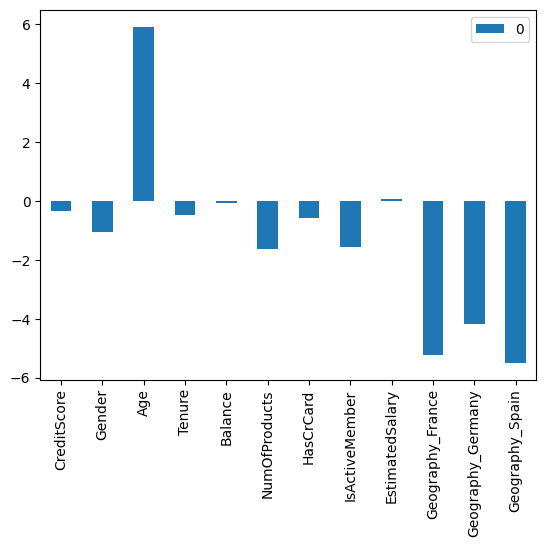

In [ ]:
feature_coef.plot.bar()

**Handling the biasness - Class weight manipulation**

In [ ]:
X2.shape

(10000, 12)

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X2,y,train_size=0.75,random_state = 1)

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

xtrainScaled1 = scaler1.fit_transform(xtrain1)
xtestScaled1 = scaler1.transform(xtest1)

In [ ]:
print(ytrain1.value_counts())

Exited
0    5949
1    1551
Name: count, dtype: int64


In [ ]:
modelB = LogisticRegression(class_weight={0 : 1 , 1 : 4})
modelB.fit(xtrainScaled1 ,ytrain1)

LogisticRegression(class_weight={0: 1, 1: 4})

In [ ]:
print("Training Data Accuracy:", modelB.score(xtrainScaled1 ,ytrain1))

Training Data Accuracy: 0.7041333333333334


In [ ]:
print("Training Data Accuracy:", modelB.score(xtestScaled1,ytest1))

Training Data Accuracy: 0.7204


In [ ]:
print(classification_report(ytrain1 , modelB.predict(xtrainScaled1)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      5983
           1       0.38      0.70      0.49      1517

    accuracy                           0.70      7500
   macro avg       0.64      0.70      0.64      7500
weighted avg       0.80      0.70      0.73      7500



In [ ]:
print(classification_report(ytest1 , modelB.predict(xtestScaled1)))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1980
           1       0.40      0.68      0.50       520

    accuracy                           0.72      2500
   macro avg       0.65      0.71      0.65      2500
weighted avg       0.79      0.72      0.74      2500



In [ ]:
#Predicted value on test data
modelB.predict(xtestScaled1)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
modelB.predict_proba(xtestScaled1)

array([[0.69615802, 0.30384198],
       [0.61157268, 0.38842732],
       [0.62626612, 0.37373388],
       ...,
       [0.67724176, 0.32275824],
       [0.23124798, 0.76875202],
       [0.6605159 , 0.3394841 ]])